In [52]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
originalDataPath = '/home/hduser0539/projectsData/privateProjectData/facial-keypoints-detection'
tmpTrainingfile = 'tmpTraining.csv'
tmpFilePath = os.path.join(originalDataPath,tmpTrainingfile)

In [54]:
tmpData = pd.read_csv(tmpFilePath)
tmpData.shape

(99, 31)

In [69]:
columns = tmpData.columns.tolist()
s = str(columns)
print(s)
type(columns)
nc = columns[:-1]
for i in zip(nc[::2],nc[1::2]):
    print(i)


['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x', 'right_eye_center_y', 'left_eye_inner_corner_x', 'left_eye_inner_corner_y', 'left_eye_outer_corner_x', 'left_eye_outer_corner_y', 'right_eye_inner_corner_x', 'right_eye_inner_corner_y', 'right_eye_outer_corner_x', 'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x', 'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x', 'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x', 'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x', 'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y', 'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x', 'mouth_right_corner_y', 'mouth_center_top_lip_x', 'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x', 'mouth_center_bottom_lip_y', 'Image']
('left_eye_center_x', 'left_eye_center_y')
('right_eye_center_x', 'right_eye_center_y')
('left_eye_inner_corner_x', 'left_eye_inner_corner_y')
('left_eye_outer_corner_x', 'left_eye_outer_corner_y')
('right_eye_inner_corner_x

In [26]:
a=tmpData['Image'][10]
type(a)
b=a.split()
type(b)
c = [int(i) for i in b]
type(c)
d = np.array(c)
type(d)
print(d.shape)
e = d.reshape((96,96))
print(e.shape)

(9216,)
(96, 96)


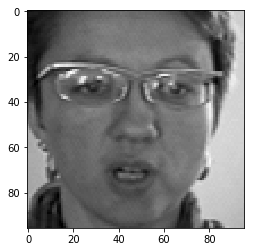

In [27]:
plt.imshow(e,cmap='gray')

In [35]:
dataframe = tmpData
feature_cols = dataframe.columns[:-1] 
dataframe = dataframe.dropna()
t = dataframe[feature_cols].values
print(t.shape)
print(t)

(99, 30)
[[ 66.03356391  39.00227368  30.22700752 ...,  72.93545865  43.13070677
   84.48577444]
 [ 64.33293617  34.9700766   29.9492766  ...,  70.26655319  45.46791489
   85.48017021]
 [ 65.05705263  34.90964211  30.90378947 ...,  70.19178947  47.27494737
   78.65936842]
 ..., 
 [ 65.88342857  36.91387013  30.78109091 ...,  65.60914286  48.61090909
   80.09579221]
 [ 67.57628571  31.16768571  30.41914286 ...,  66.02657143  53.40257143
   81.34885714]
 [ 71.11064151  35.92664151  28.7474717  ...,  71.81403774  46.55637736
   88.27411321]]


In [36]:
y = dataframe[feature_cols].values / 96.0
print(y)

[[ 0.68784962  0.40627368  0.31486466 ...,  0.75974436  0.4492782
   0.88006015]
 [ 0.67013475  0.36427163  0.31197163 ...,  0.73194326  0.47362411
   0.89041844]
 [ 0.67767763  0.36364211  0.32191447 ...,  0.73116447  0.49244737
   0.81936842]
 ..., 
 [ 0.68628571  0.38451948  0.32063636 ...,  0.68342857  0.50636364
   0.83433117]
 [ 0.70391964  0.32466339  0.31686607 ...,  0.68777679  0.55627679
   0.84738393]
 [ 0.74073585  0.37423585  0.29945283 ...,  0.74806289  0.48496226
   0.91952201]]


In [43]:
from sklearn.utils import shuffle
def load(filePath=None,test=False, cols=None):
    """Loads data from FTEST if *test* is True, otherwise from FTRAIN.
    Pass a list of *cols* if you're only interested in a subset of the
    target columns.
    """
    df = pd.read_csv(filePath)  # load pandas dataframe

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]

    print(df.count())  # prints the number of values for each column
    df = df.dropna()  # drop all rows that have missing values in them

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=42)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None

    return X, y

In [44]:
originalDataPath = '/home/hduser0539/projectsData/privateProjectData/facial-keypoints-detection'
tmpTrainingfile = 'tmpTraining.csv'
tmpFilePath = os.path.join(originalDataPath,tmpTrainingfile)

In [45]:
x,y = load(filePath=tmpFilePath)

left_eye_center_x            99
left_eye_center_y            99
right_eye_center_x           99
right_eye_center_y           99
left_eye_inner_corner_x      99
left_eye_inner_corner_y      99
left_eye_outer_corner_x      99
left_eye_outer_corner_y      99
right_eye_inner_corner_x     99
right_eye_inner_corner_y     99
right_eye_outer_corner_x     99
right_eye_outer_corner_y     99
left_eyebrow_inner_end_x     99
left_eyebrow_inner_end_y     99
left_eyebrow_outer_end_x     99
left_eyebrow_outer_end_y     99
right_eyebrow_inner_end_x    99
right_eyebrow_inner_end_y    99
right_eyebrow_outer_end_x    99
right_eyebrow_outer_end_y    99
nose_tip_x                   99
nose_tip_y                   99
mouth_left_corner_x          99
mouth_left_corner_y          99
mouth_right_corner_x         99
mouth_right_corner_y         99
mouth_center_top_lip_x       99
mouth_center_top_lip_y       99
mouth_center_bottom_lip_x    99
mouth_center_bottom_lip_y    99
Image                        99
dtype: i

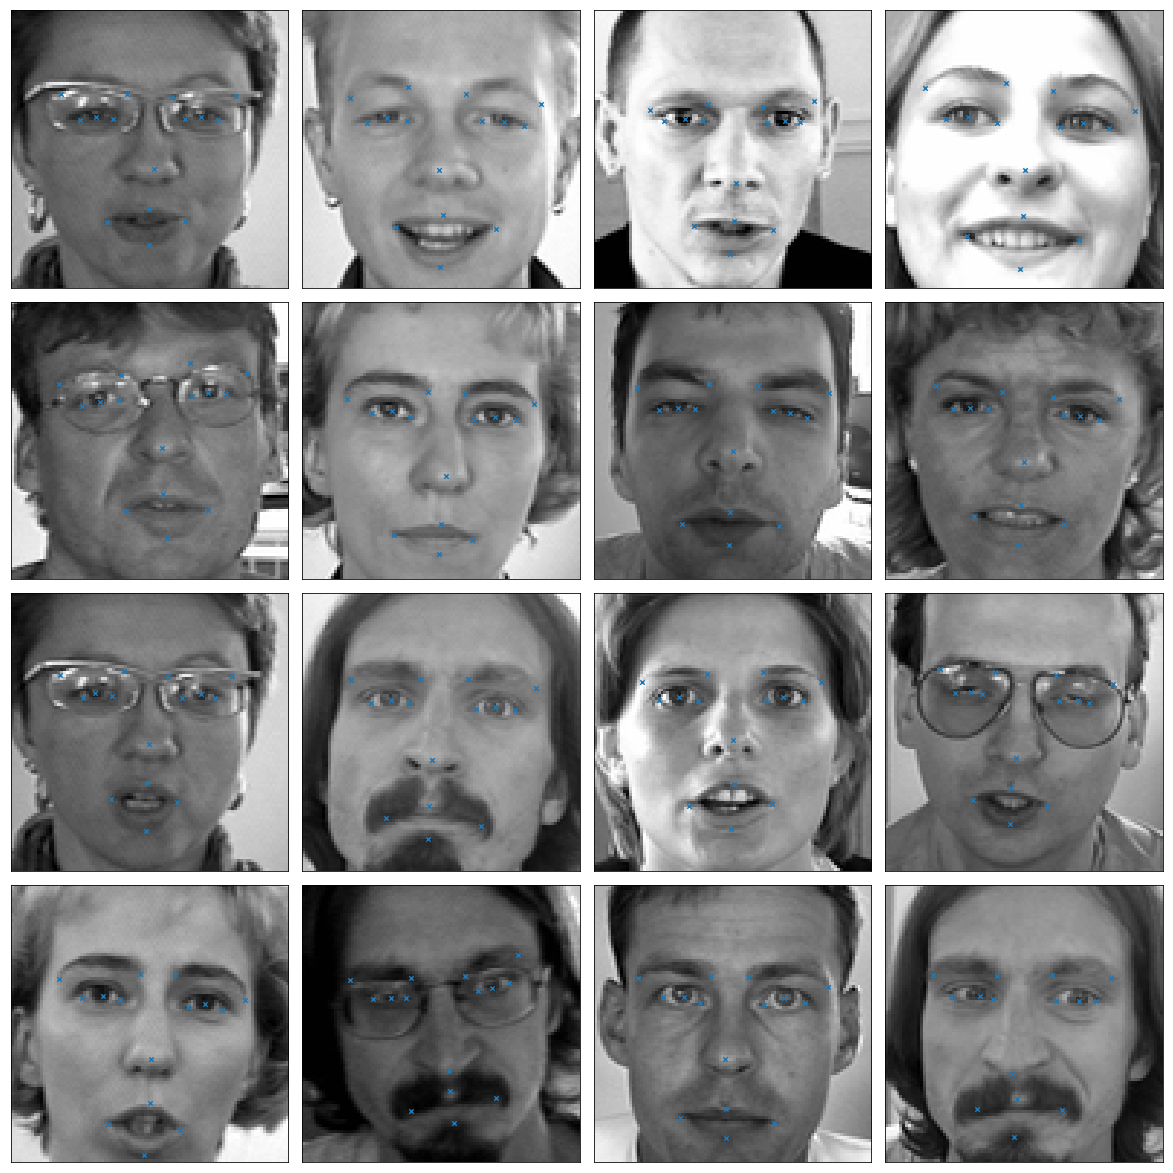

In [51]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=20)

X = x
y_pred = y

fig = plt.figure(figsize=(16, 16))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

plt.show()